# 가상의 통신사 데이터를 활용한 고객 이탈 분석 및 예측 모델 개발

__팀__: HKU Data Analytics Society (정인범, 정하빈, 김해준)\
__작성자:__ 정인범, 정하빈, 김해준

## 서론
  
통신 회사에 국한되지 않고 구독 서비스를 기반으로 하는 플랫폼의 경우 고객 이탈률을 감소 혹은 리텐션 유지 및 증가는 신규 고객 유치만큼이나 중요한 목표다. 머신러닝의 발전으로 고객 이탈 분석 및 이탈 예측 모델 개발이 활성화 되었으며, 이로 인해 다양한 전략을 수립을 가능케 했다. 비즈니스 목표에 따라 분석의 방향이 달라질 수 있고, 분석 결과를 토대로 비즈니스 의사를 결정할 수도 있다. <br>
  
본 리포트에서는 IBM에서 제공된 가상의 통신사 고객 데이터를 활용해 전반적인 EDA, LTV 분석, Post Model Analysis 등을 활용해 어떤 단기 혹은 중장기 대응책을 마련할 수 있고, 고객 생애 가치 (LTV) 가 높은 그룹의 이탈 분석 그리고 전체적인 고객의 이탈 분석의 비교를 통해 높은 LTV 고객들의 특정한 이탈 원인이 존재하는지 규명하고자 한다.

## 목차

0. 데이터 소개
1. EDA
2. 피쳐 분석 및 엔지니어링
3. 부스팅 기반 예측 모델 및 Post Model Analysis <br>
    3-1. 전체 데이터 셋 <br>
    3-2. High-LTV vs. Else <br>
    3-3. 단기 고객
4. 분석 결과 기반 대응책 마련

## 데이터 소개


7043 observations with 33 variables <br>
  
CustomerID: A unique ID that identifies each customer. <br>
  
Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set. <br>
  
Country: The country of the customer’s primary residence. <br>
  
State: The state of the customer’s primary residence. <br>
  
City: The city of the customer’s primary residence. <br>
  
Zip Code: The zip code of the customer’s primary residence. <br>
  
Lat Long: The combined latitude and longitude of the customer’s primary residence.<br>
  
Latitude: The latitude of the customer’s primary residence. <br>
  
Longitude: The longitude of the customer’s primary residence. <br>
  
Gender: The customer’s gender: Male, Female <br>
  
Senior Citizen: Indicates if the customer is 65 or older: Yes, No <br>
  
Partner: Indicate if the customer has a partner: Yes, No <br>
  
Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc. <br>
  
Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above. <br>
  
Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No <br>
  
Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No <br>
  
Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable. <br>
  
Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No <br>
  
Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No <br>
  
Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No <br>
  
Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No <br>
  
Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service. <br>
  
Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service. <br>
  
Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year. <br>
  
Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No <br>
  
Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check <br>
  
Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company. <br>
  
Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.<br>
  
Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value. <br>
  
Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label. <br>
  
Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn. <br>
  
CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn. <br>
  
Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category. <br>
  
__Source__ <br>
  
This dataset is detailed in: <br>
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113 <br>
  
Downloaded from: <br>
https://community.ibm.com/accelerators/?context=analytics&query=telco%20churn&type=Data&product=Cognos%20Analytics <br>
  
There are several related datasets as documented in: <br>
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2018/09/12/base-samples-for-ibm-cognos-analytics <br>

__본 데이터셋은 IBM사에서 공개적으로 제공된 가상의 데이터 셋으로, 실제 비즈니스 활용의 가치가 존재하지 않음을 명시한다. 데이터의 실용성과 신뢰도를 별개로 본 리포트는 비즈니스 인사이트를 얻는 과정을 연습을 목표로 한다.__

## Exploratory Data Anlaysis

본 파트는 탐색적 데이터 분석으로 추후에 활용될 분석 기법들이 왜 사용되었는지에 대한 인사이트를 얻는 과정을 전달하고자 한다.

In [ ]:
import pandas as pd #데이터 프레임 조작
import numpy as np #어레이 조작

from matplotlib import pyplot as plt #시각화 툴 1
import seaborn as sns #시각화 툴 2

import warnings #경고 무시
warnings.filterwarnings(action='ignore')

from google.colab import files
import io

uploaded = files.upload() #드라이브의 데이터셋 사용
data = pd.read_excel(io.BytesIO(uploaded["Telco_customer_churn.xlsx"]))
data.head()

Saving Telco_customer_churn.xlsx to Telco_customer_churn.xlsx


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#1. 기초 통계량
data.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


실수 자료형들을 포함한 변수들의 기초 통계량 다룬다. 위 결과에서 Count, Zip Code, 와 Churn Value 변수들을 제외한 변수들은 연속형으로써, 기초 통계량을 살펴보는 것에 의미가 있다.

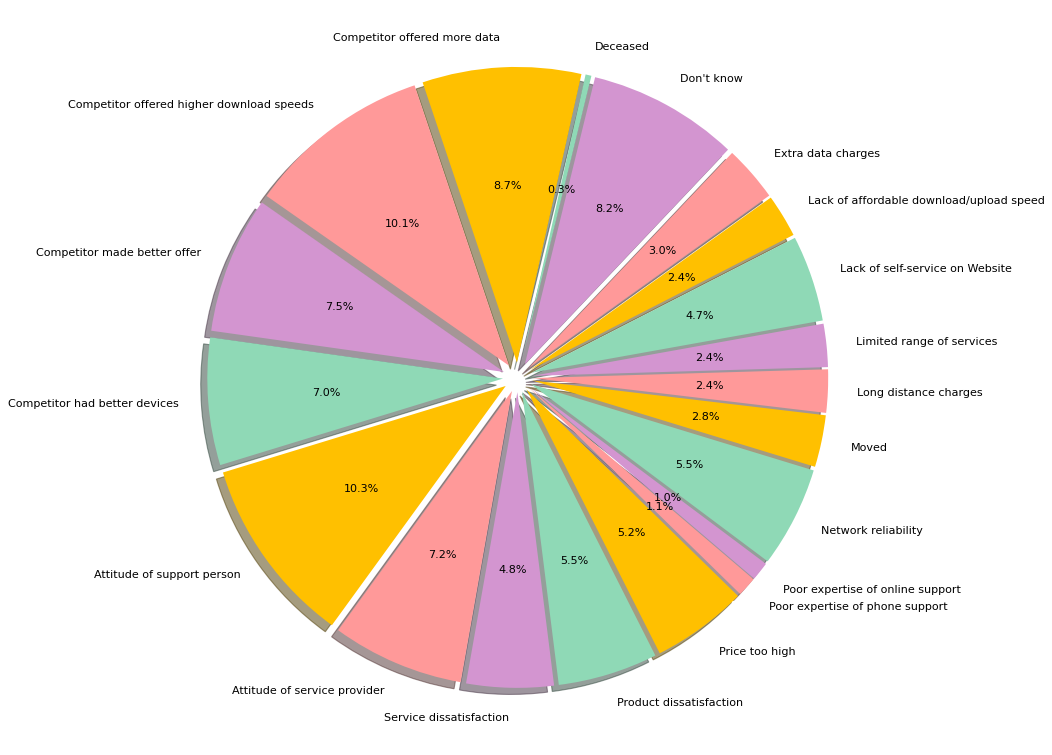

In [ ]:
#2. 고객 이탈 이유 시각화
groupby_reason = data.groupby('Churn Reason').sum()

from matplotlib.pyplot import figure

figure(figsize=(20, 12), dpi=80)

reason_count = groupby_reason['Count']

colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
explode = [0.05 for i in range(20)]
plt.pie(reason_count, labels=reason_count.index, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

계약을 해지한 고객들의 33% 가량이 경쟁사의 제품 및 서비스가 더 낫다라는 이유이다. 또한 17% 가량의 고객이 직원의 태도를 문제 삼았으며, 10% 가량의 고객이 제품 및 서비스 불만족을 이야기 했다.

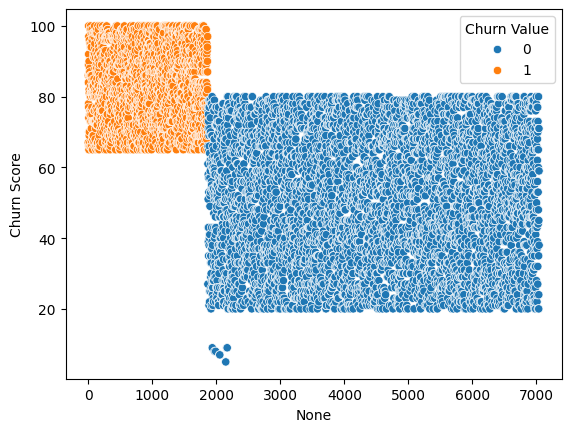

In [ ]:
#3. 고객 이탈 여부 시각화
ax = sns.scatterplot(data=data, x=data.index, y='Churn Score', hue = "Churn Value")

인덱스 별로 고객의 이탈 점수를 산점도에 시각화 했다. Churn Score (이탈 점수) 은 IBM에 따르면 IBM SPSS Modeler 를 사용해 도출했다고 한다. 더 높은 점수의 고객일수록 이탈 가능성이 높아진다. Churn Value 가 1 (주황색) 이면 이탈을 했고, 0 (파란색) 이면 이탈을 하지 않았다. 이 플롯을 통해 다음과 같은 인사이트를 도출했다: <br>
  
1. __이상치 탐색의 필요성:__ 플롯을 참고하면, 이탈 점수가 20 미만으로 현격히 낮은 점수의 고객들이 있다. 이들은 다른 고객과 어떤 차별점을 가지고 있는지 분석해 볼 필요가 있다.
2. __불균형 데이터:__ 이탈을 한 고객과 하지 않은 고객의 수에 차이가 상당히 크다는 것을 알 수 있다. 이는 추후에 예측 모델 성능의 저하 및 편향성을 초래할  수 있다. 따라서 본 분석에서는 SMOTE (Synthetic Minority Over-sampling TEchnique) Upsampling 기법을 통해 이탈한 고객의 데이터의 수를 늘린다.
3. __인위적인 상하계:__ 몇 이상 데이터를 제외하고서는 굉장히 인위적으로 플롯의 상계와 하계가 뚜렷하다. 대략 20정도에 경계가 생긴 것처럼 보인다. 이는 가상의 데이터셋이기에 그럴 가능성도 존재하지만, 직접적인 증거는 존재하지 않는다.

In [ ]:
#3-1. 이상 데이터 탐색
odd_points = data[data["Churn Score"] < 20]
odd_points.T

,1938,1975,1991,2054,2055,2148,2166,2171
CustomerID,4767-HZZHQ,3146-MSEGF,7554-NEWDD,9058-HRZSV,4522-AKYLR,7156-MXBJE,5876-QMYLD,7606-BPHHN
Count,1,1,1,1,1,1,1,1
Country,United States,United States,United States,United States,United States,United States,United States,United States
State,California,California,California,California,California,California,California,California
City,Redondo Beach,Paramount,Long Beach,Baldwin Park,Chino Hills,San Diego,Earp,La Quinta
Zip Code,90277,90723,90815,91706,91709,92127,92242,92253
Lat Long,"33.830453, -118.384565","33.897122, -118.164432","33.797638, -118.11662","34.098275, -117.967399","33.942895, -117.725644","33.017518, -117.118456","34.137742, -114.36514","33.695532, -116.310571"
Latitude,33.830453,33.897122,33.797638,34.098275,33.942895,33.017518,34.137742,33.695532
Longitude,-118.384565,-118.164432,-118.11662,-117.967399,-117.725644,-117.118456,-114.36514,-116.310571
Gender,Male,Female,Male,Female,Female,Female,Female,Male


위 여덟 고객은 굉장히 낮은 이탈 점수를 기록한 고객들이다. 허나 그들만의 특별한 공통 분모가 보이지 않고, 다른 고객들과의 차별점 역시 존재하지 않는 것 같아 단순 IBM사의 모델에서 점수 측정에 오류가 났거나 별도의 사연이 있는 고객이라는 가정 정도밖에 내리지 못하므로, 위 여덟 고객의 데이터는 최종 데이터셋에서 제외해야 한다.

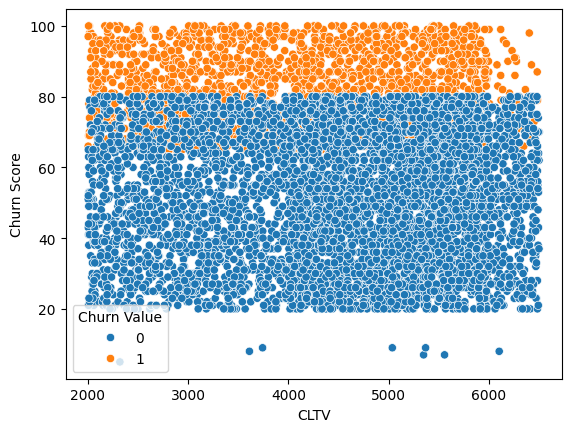

In [ ]:
#4. LTV (고객 생애 가치) 에 따른 이탈 여부 시각화
ax = sns.scatterplot(data=data, x='CLTV', y='Churn Score', hue = "Churn Value")

위의 플롯은 고객 생애 가치 (LTV) 에 따라 이탈 점수를 산점도에 시각화한 플롯이다. 얼핏 보기에는 낮은 LTV 의 고객들의 이탈률이 더 높아 보이지만, 실제 차이는 그렇게 극명하지 않다.

In [ ]:
#4-1. LTV 구간 별 고객 이탈률
intv23 = data[(data["CLTV"] >= 2000) & (data["CLTV"] < 3000)].groupby('Churn Label').sum()
intv34 = data[(data["CLTV"] >= 3000) & (data["CLTV"] < 4000)].groupby('Churn Label').sum()
intv45 = data[(data["CLTV"] >= 4000) & (data["CLTV"] < 5000)].groupby('Churn Label').sum()
intv56 = data[(data["CLTV"] >= 5000) & (data["CLTV"] < 6000)].groupby('Churn Label').sum()
intv67 = data[(data["CLTV"] >= 6000) & (data["CLTV"] < 7000)].groupby('Churn Label').sum()
intv50 = data[(data["CLTV"] >= 4527)].groupby('Churn Label').sum()
print("Proportion of Churn in the Interval (2000 - 2999) CLTV: ", intv23.iloc[1,0]/(intv23.iloc[0,0]+intv23.iloc[1,0]))
print("Proportion of Churn in the Interval (3000 - 3999) CLTV: ", intv34.iloc[1,0]/(intv34.iloc[0,0]+intv34.iloc[1,0]))
print("Proportion of Churn in the Interval (4000 - 4999) CLTV: ", intv45.iloc[1,0]/(intv45.iloc[0,0]+intv45.iloc[1,0]))
print("Proportion of Churn in the Interval (5000 - 5999) CLTV: ", intv56.iloc[1,0]/(intv56.iloc[0,0]+intv56.iloc[1,0]))
print("Proportion of Churn in the Interval (6000 - 6999) CLTV: ", intv67.iloc[1,0]/(intv67.iloc[0,0]+intv67.iloc[1,0]))
print("Proportion of Churn in the above second quantile: ", intv50.iloc[1,0]/(intv50.iloc[0,0]+intv50.iloc[1,0]))

Proportion of Churn in the Interval (2000 - 2999) CLTV:  0.35877862595419846
Proportion of Churn in the Interval (3000 - 3999) CLTV:  0.3274410774410774
Proportion of Churn in the Interval (4000 - 4999) CLTV:  0.23882017126546146
Proportion of Churn in the Interval (5000 - 5999) CLTV:  0.24068901303538176
Proportion of Churn in the Interval (6000 - 6999) CLTV:  0.0892018779342723
Proportion of Churn in the above second quantile:  0.22430437251561613


LTV의 구간별로 고객들을 세분화해 이탈률을 계산했다. LTV 가 높아질수록 이탈률이 감소하는 추세를 보이지만, 그 차이가 보는 시각에 따라서는 대동소이하다고 말할 수 있다. 특히 5000-5999 구간의 이탈률이 4000-4999 구간의 이탈률보다 근소하게 높은 점을 감안하면, 고-LTV 군의 이탈률 감소 대응책을 마련하는 안건도 우선적으로 고려해 볼 가치가 있다고 생각한다. <br>
  
고로 본 분석에서는 고-LTV 고객군에 대한 이탈 분석 역시 진행할 예정이며, 해당 고객군을 제외한 다른 고객들과의 이탈 요인에 차이가 있는지 탐색한다. <br>
  
또한 LTV의 여부를 떠나서 절대적인 이탈률 수치 역시 결코 낮다고 생각되지 않기 때문에 단기 혹은 중장기 대응책을 고안할 필요가 있다.

<Axes: ylabel='count'>

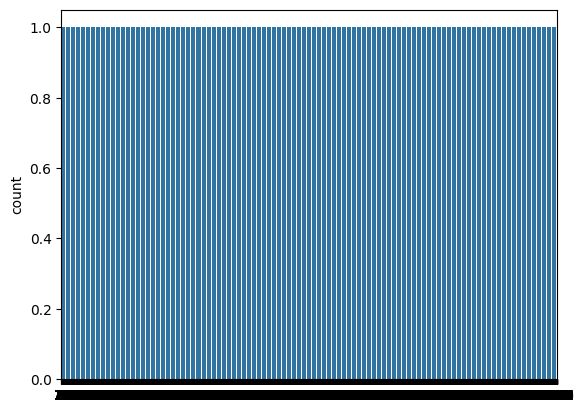

In [ ]:
#5. 사용 기간이 짧은 고객 시각화
tmp = data['Tenure Months'].copy()
sns.countplot(tmp)

위 그래프를 참고하면, 1개월 사용자의 비율이 높다는 것을 알 수 있다. 가령, 한 달 선불 유심칩 사용자처럼 단기 사용자가 꽤 많다는 것이다. 72개월간 계약을 유지한 고객의 비율도 상당히 높은데, 이는 아마 제공자측에서 데이터를 정의할 때, 72개월 이상의 사용자를 모두 72개월로 포함했을 수 있다. <br>
  
고로, 단기 계약 혹은 단기 사용자들이 이탈하는 이유를 조금 더 면밀히 파악할 필요가 있으며, 계약 종료 이외에 어떤 변수들이 존재하는지, 그리고 어떤 변수들이 가령 이들의 이탈을 방지할 수 있을지 확인해야한다.

In [ ]:
print('월 계약 사용자 수:',len(data[data['Contract']=='Month-to-month']))
print('월 계약 사용자 비율:', len(data[data['Contract']=='Month-to-month']) / len(data))

월 계약 사용자 수: 3875
월 계약 사용자 비율: 0.5501916796819537


더불어 계약 종류가 월 계약인 고객의 비율이 상당히 높다는 것을 볼 수 있다. 업계 평균이 얼마나 될지는 모르겠지만, 이는 꽤나 중요하게 짚고 넘어갈 포인트다. 만약 해당 통신사가 단기 계약 고객을 유치하는 것이 장점이라면, 이 수치를 늘려야하고, 반대의 경우, 해당 단기 계약 고객의 장기 계약 고객으로의 전환율을 목표로 할 수 있다. <br>
  
고로 본 분석에서 단기 고객의 계약 종료 및 유지 거부 요인을 보다 더 자세하게 탐색하고자 한다.

## 피쳐 분석

### a. 피쳐 분석: 상관 관계 분석
  
변수와 이탈 여부간의 유의미한 상관 관계가 존재하는지 확인하기 위함으로 진행되는 파트다. 연속형 변수들과 범주형 변수들을 고려할 예정이며, 연속형 변수와 이탈 여부의 상관 관계는 Point-Biserial 상관 계수를 참고하며, 범주형 변수와 이탈 여부의 상관 관계는 Cramer's V를 확인한다.

In [ ]:
#1. 연속형 변수
import scipy.stats as stats
numeric_variables = ['Tenure Months', 'Monthly Charges', 'CLTV']
target = 'Churn Value'

for i in numeric_variables:
    print(stats.pointbiserialr(data[i].values, data[target].values))

SignificanceResult(statistic=-0.3522286701130777, pvalue=7.999057960596605e-205)
SignificanceResult(statistic=0.19335642223784716, pvalue=2.706645606887267e-60)
SignificanceResult(statistic=-0.1274631017174497, pvalue=6.679131381698816e-27)


이 세 연속형 변수중 어느 정도 유의미한 영향을 미친다고 고려할 수 있는 변수는 -0.35의 상관 계수를 가진 계약 기간 변수다. 계약 기간이 길수록 계약 해지를 하지 않은 확률이 높아지는 것은 논리적으로도 설명이 된다. 단독으로는 크게 영향을 미치는 요소는 아닐지언정, 어느 정도 이탈에 대한 제약 정도로 작용한다고 볼 수 있다. <br>
  
월 요금도 일반적인 생각과는 다르게 이탈 여부에 유의미한 영향을 미치지 않는데, 이는 위의 파이 차트에서도 드러나듯이 주 이탈 요인에 속하지 않는다. <br>
  
LTV는 이탈 여부와는 크게 상관없는 요소이지만, 앞선 부분에서도 언급했듯이, 비즈니스적인 측면에서 봤을 때 LTV가 높은 사람일수록 이탈을 방지하는 것이 기업 차원에서 득이 되기 때문에 해당 계수를 증가시키는 것을 목표라 할 수 있겠다.

In [ ]:
#2. 범주형 변수
#Utility Function: 문자형 자료를 정수형 자료로 변환
def rep(data, cols):
    df = data.copy()
    for col in cols:
        values = df[col].unique()
        for i in range(len(values)):
            df[col] = df[col].replace({values[i]:i+1})
    return df

In [ ]:
#Cramer's V
import scipy.stats as stats

def CramerV(df, col):
    df2 = np.array(df[[col, "Churn Value"]])
    X2 = stats.chi2_contingency(df2, correction=False)[0]
    n = np.sum(df2)
    minDim = min(data.shape)-1
    V = np.sqrt((X2/n) / minDim)
    print(col, ":", V)

In [ ]:
cat_variables = ['Gender','Senior Citizen','Partner','Dependents','Phone Service','Multiple Lines','Internet Service',
               'Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies',
               'Contract','Paperless Billing','Payment Method']
target2 = 'Churn Value'

new_ = rep(data, cat_variables)
for i in cat_variables:
    CramerV(new_, i)

Gender : 0.09884749681759547
Senior Citizen : 0.10211639580576946
Partner : 0.10310777427708748
Dependents : 0.10907628994898486
Phone Service : 0.10609573490736432
Multiple Lines : 0.09733063261111115
Internet Service : 0.09351690402851438
Online Security : 0.09114906453599685
Online Backup : 0.09459043330009734
Device Protection : 0.1048976895013147
Tech Support : 0.10806164444515544
Streaming TV : 0.10101001386276161
Streaming Movies : 0.1009726584721502
Contract : 0.11029754008239613
Paperless Billing : 0.10548140621521522
Payment Method : 0.09007853023872124


In [ ]:
data['Payment Method'].unique()

array(['Mailed check', 'Electronic check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

범주형 변수들과 이탈 여부간의 상관 관계를 분석 했을 때 역시 변수가 단독적으로 이탈 여부에 지대한 영향을 미치는 경우는 드물다. 계약 해지는 하나의 요인에 의해서가 아니라 복합적인 이유들로 도달하는 의사 결정 단계다. Cramer's V값 같은 경우는 0~1 사이의 값을 가지고 1에 가까울수록 더 높은 상관 관계를 의미한다. 대부분의 변수가 비슷한 정도의 상관 관계를 가지고 있으며, 역시 크게 유의미하지 않다고 볼 수 있다.

### b. 피쳐 분석: 피쳐 분류
  
범주형 변수들 중 비슷한 성격을 가진 변수들이 존재한다. 이들을 따로 카테고리로 묶어서 또다른 변수로 추가한다면 의미있는 변수가 되지 않을까 생각한다. 두 종류의 카테고리를 생각해 볼 수 있는데, Streaming TV 변수와 Streaming Movies 변수들을 묶어서 Num_Streaming (구독 서비스 개수) 변수를 추가하고, 보험 성향을 띄는 Online Security, Online Backup, Device Protection, Tech Support 변수를 하나로 묶어서 Num_Insurance (보험 서비스 개수) 변수를 추가한다. 마지막으로 자동 결제 및 온라인 청구서 둘 다 신청한 사람들을 Autopay 변수로 추가하고자한다. <br>
  
각 추가될 변수들이 이탈 여부에 유의미한 영향을 미치는지 분석하고 만약 그렇다면, 최종 모델 훈련 데이터 셋에 포함시키고자 한다. <br>

In [ ]:
#1. Num_Streaming 분석
def numStreaming(df, i):
    cnt = 0
    if df.iloc[i,0] == 'Yes':
        cnt += 1
    if df.iloc[i,1] == 'Yes':
        cnt += 1
    return cnt

streaming_X = data[['Streaming TV','Streaming Movies']]
streaming_y = data['Churn Value']

res_streaming = []
for i in range(len(streaming_X)):
    res_streaming.append(numStreaming(streaming_X, i))
streaming_X['num_streaming'] = res_streaming
streaming_X.head()

,Streaming TV,Streaming Movies,num_streaming
0,No,No,0
1,No,No,0
2,Yes,Yes,2
3,Yes,Yes,2
4,Yes,Yes,2


In [ ]:
#1-1. 회귀 분석
import statsmodels.api as sm

X_Str = streaming_X['num_streaming']
x2 = sm.add_constant(X_Str)
model = sm.OLS(streaming_y, x2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            Churn Value   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     35.84
Date:                Thu, 29 Feb 2024   Prob (F-statistic):           2.25e-09
Time:                        18:19:52   Log-Likelihood:                -4218.0
No. Observations:                7043   AIC:                             8440.
Df Residuals:                    7041   BIC:                             8454.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2369      0.007     33.453

num_streaming 의 회귀 계수를 살펴보면 굉장히 낮은걸 발견할 수 있다.

<Axes: xlabel='num_streaming', ylabel='count'>

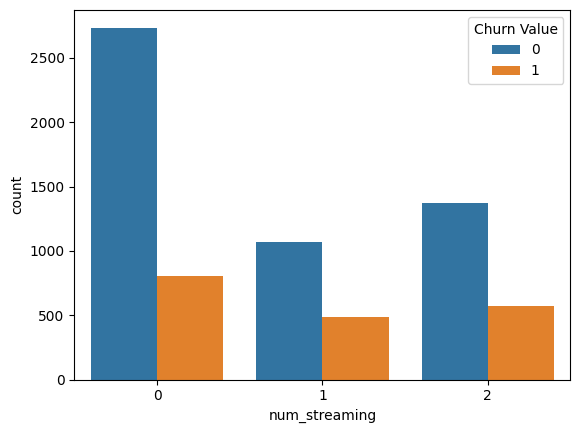

In [ ]:
#1-2. 스트리밍 구독 개수에 따른 이탈 시각화
streaming = pd.concat([X_Str, streaming_y], axis = 1)
sns.countplot(x='num_streaming', hue='Churn Value', data=streaming)

스트리밍 구독 갯수에 따른 고객 이탈 여부를 시각화했다. 구독 갯수와는 상관 없이 이탈률은 감소하지 않았다. 이 말인 즉슨, 구독을 몇개를 했건 계약 해지를 하는데 영향을 미치지 않는 점이다. 고로, 해당 변수는 포함하지 않는다.

In [ ]:
#2. Num_Insurance 분석
def numInsurance(df, i):
    cnt = 0
    if df.iloc[i,0] == 'Yes':
        cnt += 1
    if df.iloc[i,1] == 'Yes':
        cnt += 1
    if df.iloc[i,2] == 'Yes':
        cnt += 1
    if df.iloc[i,3] == 'Yes':
        cnt += 1
    return cnt

insurance_X = data[['Online Security','Online Backup','Device Protection','Tech Support']]
insurance_y = data['Churn Value']

res_insurance = []
for i in range(len(insurance_X)):
    res_insurance.append(numStreaming(insurance_X, i))
insurance_X['num_insurance'] = res_insurance
insurance_X.head()

,Online Security,Online Backup,Device Protection,Tech Support,num_insurance
0,Yes,Yes,No,No,2
1,No,No,No,No,0
2,No,No,Yes,No,0
3,No,No,Yes,Yes,0
4,No,Yes,Yes,No,1


In [ ]:
insurance_X[insurance_X['num_insurance'] > 2]

,Online Security,Online Backup,Device Protection,Tech Support,num_insurance


눈 여겨 볼 사항은 위 네 변수를 모두 구독하는 고객이 없을뿐더러, 3개 구독하는 고객도 없다. 이는 비즈니스 차원에서 인지하고 가야할 부분이며, 만약 num_insurance 가 이탈 여부에 어느 정도 상관 관계가 존재한다면, 해당 성질의 서비스를 더 많이 구독하게끔 하는 전략이 필요하다.

In [ ]:
#2-1. 회귀 분석
X_Ins = insurance_X['num_insurance']
x2 = sm.add_constant(X_Ins)
model = sm.OLS(insurance_y, x2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            Churn Value   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     177.4
Date:                Thu, 29 Feb 2024   Prob (F-statistic):           5.38e-40
Time:                        18:19:53   Log-Likelihood:                -4148.2
No. Observations:                7043   AIC:                             8300.
Df Residuals:                    7041   BIC:                             8314.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3242      0.007     47.538

회귀 분석 결과에 따르면, 보험 성질의 서비스의 구독 갯수와 이탈 여부는 크게 유의미하지 않다고 해석할 수 있다.

<Axes: xlabel='num_insurance', ylabel='count'>

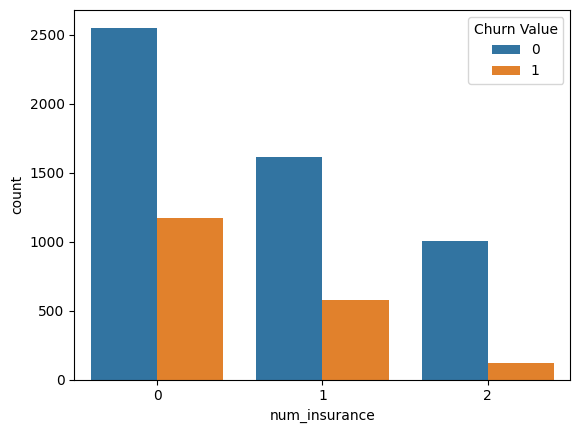

In [ ]:
#2-2. 보험 서비스 구독 개수에 따른 이탈 시각화
insurance = pd.concat([X_Ins, insurance_y], axis = 1)
sns.countplot(x='num_insurance', hue='Churn Value', data=insurance)

해당 성질의 서비스 구독 갯수를 막대 그래프에 시각화 했을 때, 절대적인 이탈의 숫자가 감소했을뿐더러, 이탈률도 감소하는 추세를 보였다. 이는 충분히 최종 모델의 변수로 활용될 수 있다.

In [ ]:
#1. Autopay 분석
def Auto(df, i):
    value = 0
    if df.iloc[i,0] == 'Yes' and (df.iloc[i,1] == 'Bank transfer (automatic)' or df.iloc[i,1] == 'Credit card (automatic)'):
        value = 1
    return value

auto_X = data[['Paperless Billing','Payment Method']]
auto_y = data['Churn Value']

res_auto = []
for i in range(len(auto_X)):
    res_auto.append(Auto(auto_X, i))
auto_X['Autopay'] = res_auto
auto_X.head()

,Paperless Billing,Payment Method,Autopay
0,Yes,Mailed check,0
1,Yes,Electronic check,0
2,Yes,Electronic check,0
3,Yes,Electronic check,0
4,Yes,Bank transfer (automatic),1


In [ ]:
#Phi 상관 관계 분석
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(auto_X['Autopay'], auto_y)

-0.0863195140204161

해당 변수를 포함한 가장 큰 이유는 온라인 청구서와 자동 결제로 인해 편의성이 증대하고 지출에 대한 인지가 덜 하면 계약을 해지하려는 경향이 줄지 않을까하는 생각에 추가했다. 반비례 계수를 통해 해당 가설을 확인했으나, 계수의 절댓값이 너무 적기때문에 유의미한 상관 관계를 가진다고 보기 어렵다.

<Axes: xlabel='Autopay', ylabel='count'>

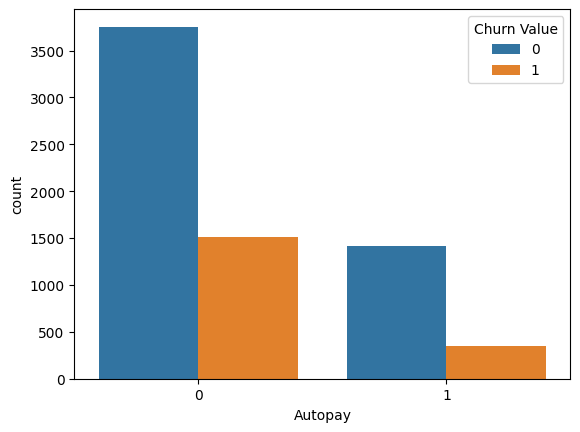

In [ ]:
X_auto = auto_X['Autopay']
auto_df = pd.concat([X_auto, auto_y], axis = 1)
sns.countplot(x='Autopay', hue='Churn Value', data=auto_df)

앞선 변수들처럼 시각화 했을 때, 이탈률이 줄어든 것을 볼 수 있다. 고로 최종 모델의 변수로 활용할 가치가 있다.

## 피쳐 엔지니어링

최종 데이터셋을 구축하기전에 앞서 살펴보았던 내용들을 요약부터 하고 넘어간다. <br>
  
__데이터셋 종류:__ <br>
1. train_X, train_y, test_X, test_y (전체 데이터셋)
2. ltv_train_X, ltv_train_y, ltv_test_X, ltv_test_y (고LTV)
3. else_train_X, else_train_y, else_test_X, else_test_y (고LTV 외)
  
__피쳐 엔지니어링 내용:__ <br>
1. 앞서 언급한 변수 추가 (num_insurance, autopay)
2. 이상치 제거
3. 필요없는 변수 제거
4. One-hot Encoding
5. 위 데이터셋들 제작
6. SMOTE Upsampling

In [ ]:
#1. num_insurance 및 autopay 변수 추가
temp = data.copy()
temp["num_insurance"] = res_insurance
temp["autopay"] = res_auto

In [ ]:
#2. 이상치 제거
temp = temp[temp["Churn Score"] >= 15]

In [ ]:
#3. 필요없는 변수 제거
to_drop = ['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Total Charges']
temp = temp.drop(to_drop, axis=1)

In [ ]:
#3-1. 계약 유지 기간 변수
temp['Tenure Months'] = pd.to_numeric(temp['Tenure Months'])

__지리 변수들은 이탈 여부와 직접적인 연관이 없다고 가정한다. 다른 분석에서는 지리공간적으로 분석해, 인프라 혹은 로컬 서비스에 문제가 없는지 분석할 수 있겠지만, 본 리포트는 지역적인 변수가 없다는 가정하에 진행하도록한다.__ <br>
  
"Total Charges" 변수와 같은 경우, Monthly Charges 변수로부터 independent 하지 않을뿐더러, 결측치가 존재하기 때문에 제거한다.

In [ ]:
#4. One-hot Encoding
to_dummy = ['Gender', 'Senior Citizen','Partner', 'Dependents', 'Phone Service',
            'Multiple Lines', 'Contract', 'Paperless Billing', 'Payment Method','Internet Service',
            'Online Security','Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV','Streaming Movies',
           'num_insurance', 'autopay']
temp = pd.get_dummies(data=temp, columns=to_dummy)
temp.head() #최종 데이터 셋

,Tenure Months,Monthly Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,Gender_Female,Gender_Male,Senior Citizen_No,...,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,num_insurance_0,num_insurance_1,num_insurance_2,autopay_0,autopay_1
0,2,53.85,Yes,1,86,3239,Competitor made better offer,0,1,1,...,0,0,1,0,0,0,0,1,1,0
1,2,70.70,Yes,1,67,2701,Moved,1,0,1,...,0,0,1,0,0,1,0,0,1,0
2,8,99.65,Yes,1,86,5372,Moved,1,0,1,...,0,1,0,0,1,1,0,0,1,0
3,28,104.80,Yes,1,84,5003,Moved,1,0,1,...,0,1,0,0,1,1,0,0,1,0
4,49,103.70,Yes,1,89,5340,Competitor had better devices,0,1,1,...,0,1,0,0,1,0,1,0,0,1


In [ ]:
#5-1.X_train, y_train, X_test, y_test (전체 데이터셋)
from sklearn.model_selection import train_test_split

X = temp.drop(['Churn Value', 'Churn Label', 'Churn Score', 'CLTV', 'Churn Reason'], axis=1)
y = temp["Churn Value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1004)
X_train.head()

,Tenure Months,Monthly Charges,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,num_insurance_0,num_insurance_1,num_insurance_2,autopay_0,autopay_1
387,13,74.40,0,1,1,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,1
6910,2,20.00,0,1,1,0,1,0,1,0,...,1,0,0,1,0,1,0,0,1,0
3875,19,44.90,1,0,1,0,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0
3406,18,19.65,1,0,1,0,1,0,1,0,...,1,0,0,1,0,1,0,0,1,0
373,2,93.85,1,0,0,1,1,0,1,0,...,0,1,0,0,1,1,0,0,1,0


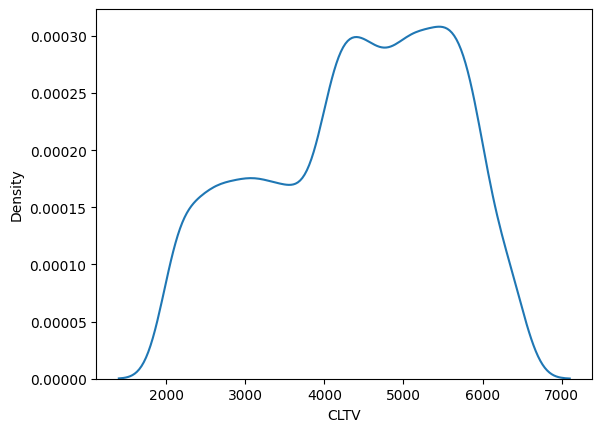

In [ ]:
#5-2. ltv_train_X, ltv_train_y, ltv_test_X, ltv_test_y (고LTV)
#5-2. else_train_X, else_train_y, else_test_X, else_test_y (고LTV 외)

#5-2-1. 기준점 정하기
sns.kdeplot(temp["CLTV"])
plt.show()

LTV를 추정 분포도를 시각화했다. 고LTV 기준점을 잡는것은 보는 시각에 따라, 혹은 회사 내부적으로 정의될 수 있다. 본 분석의 경우 4500이상의 LTV를 가진 고객을 고LTV 고객군으로 분류하기로 한다.

In [ ]:
#5-2-2. 분류하기
hi_LTV = temp[temp["CLTV"] >= 4500]
else_LTV = temp[temp["CLTV"] < 4500]
print(len(hi_LTV), len(else_LTV))

3574 3461


In [ ]:
#5-2-3. 훈련 데이터셋 제작
X_hi_LTV = hi_LTV.drop(['Churn Value', 'Churn Label', 'Churn Score', 'CLTV', 'Churn Reason'], axis=1)
y_hi_LTV = hi_LTV["Churn Value"]

X_else_LTV = else_LTV.drop(['Churn Value', 'Churn Label', 'Churn Score', 'CLTV', 'Churn Reason'], axis=1)
y_else_LTV = else_LTV["Churn Value"]

X_hi_LTV_train, X_hi_LTV_test, y_hi_LTV_train, y_hi_LTV_test = train_test_split(X_hi_LTV, y_hi_LTV, test_size=0.2, shuffle=True, random_state=1004)
X_else_LTV_train, X_else_LTV_test, y_else_LTV_train, y_else_LTV_test = train_test_split(X_else_LTV, y_else_LTV, test_size=0.2, shuffle=True, random_state=1004)


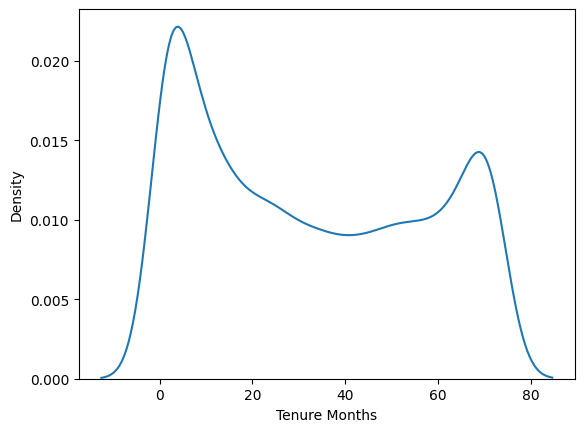

In [ ]:
#5-3 단기 고객
#5-3-1. 단기 사용 기준점 정하기
sns.kdeplot(temp["Tenure Months"])
plt.show()

In [ ]:
#5-3-2. 필터링하기
short_term = temp[temp["Tenure Months"] <= 24]
short_contract = temp[temp['Contract_Month-to-month'] == 1]
print(len(short_term), len(short_contract))

3207 3872


해당 분석에서는 계약 유지 기간이 2년 이하인 고객들을 단기 사용 고객이라 정의한다. 물론 데이터의 길이가 더 길다면 해당 기간을 줄여 분석을 진행할 수도 있다.

In [ ]:
#5-3-3. 훈련 데이터셋 제작
X_short_term = short_term.drop(['Churn Value', 'Churn Label', 'Churn Score', 'CLTV', 'Churn Reason', "Tenure Months", 'Contract_Month-to-month'], axis=1)
y_short_term = short_term["Churn Value"]

X_short_contract = short_contract.drop(['Churn Value', 'Churn Label', 'Churn Score', 'CLTV', 'Churn Reason', "Tenure Months", 'Contract_Month-to-month'], axis=1)
y_short_contract = short_contract["Churn Value"]

X_short_term_train, X_short_term_test, y_short_term_train, y_short_term_test = train_test_split(X_short_term, y_short_term, test_size=0.2, shuffle=True, random_state=1004)
X_short_contract_train, X_short_contract_test, y_short_contract_train, y_short_contract_test = train_test_split(X_short_contract, y_short_contract, test_size=0.2, shuffle=True, random_state=1004)

In [ ]:
#6. SMOTE Upsampling
#6-1. 전체 데이터셋
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_resampled, y_resampled = sm.fit_resample(X_train,y_train)
print(X_train.shape)
print(y_train.shape)
print(X_resampled.shape)
print(y_resampled.shape)

(5628, 50)
(5628,)
(8252, 50)
(8252,)


In [ ]:
#6-2. LTV 분석용
sm_hi_LTV = SMOTE(random_state=0)
sm_else_LTV = SMOTE(random_state=0)

X_hi_LTV_resampled, y_hi_LTV_resampled = sm_hi_LTV.fit_resample(X_hi_LTV_train,y_hi_LTV_train)
print("High LTV Dataset Changes:")
print(X_hi_LTV_train.shape)
print(y_hi_LTV_train.shape)
print(X_hi_LTV_resampled.shape)
print(y_hi_LTV_resampled.shape)

X_else_LTV_resampled, y_else_LTV_resampled = sm_else_LTV.fit_resample(X_else_LTV_train,y_else_LTV_train)
print("High LTV Dataset Changes:")
print(X_else_LTV_train.shape)
print(y_else_LTV_train.shape)
print(X_else_LTV_resampled.shape)
print(y_else_LTV_resampled.shape)

High LTV Dataset Changes:
(2859, 50)
(2859,)
(4442, 50)
(4442,)
High LTV Dataset Changes:
(2768, 50)
(2768,)
(3822, 50)
(3822,)


In [ ]:
#6-3 단기 고객 분석용
sm_short_term = SMOTE(random_state=0)
sm_short_contract = SMOTE(random_state=0)

X_short_term_resampled, y_short_term_resampled = sm_short_term.fit_resample(X_short_term_train,y_short_term_train)
print("Short Term Dataset Changes:")
print(X_short_term_train.shape)
print(y_short_term_train.shape)
print(X_short_term_resampled.shape)
print(y_short_term_resampled.shape)

X_short_contract_resampled, y_short_contract_resampled = sm_short_contract.fit_resample(X_short_contract_train,y_short_contract_train)
print("Short Term Dataset Changes:")
print(X_short_contract_train.shape)
print(y_short_contract_train.shape)
print(X_short_contract_resampled.shape)
print(y_short_contract_resampled.shape)

Short Term Dataset Changes:
(2565, 48)
(2565,)
(3014, 48)
(3014,)
Short Term Dataset Changes:
(3097, 48)
(3097,)
(3584, 48)
(3584,)


## 부스팅 기반 예측 모델 및 Post Model Analysis

앞서 언급했듯이 부스팅 기반의 예측 모델을 사용해 Post Model Analysis를 진행하는데, 세 가지 측면으로부터 분석을 진행하려고 한다. <br>

1. __전체 데이터 셋:__ 종합적인 데이터에 대해 이탈 여부를 예측하는 모델을 만든다. 이탈 대응에 관한 전반적인 방향 및 중장기 대응책을 제시할 수 있다.
2. __High-LTV vs. Else:__ 고객군을 고LTV와 그 외로 분류해서 더 높은 고객 생애 가치를 가진 고객들의 이탈에 미치는 요인이 그 외 그룹과 비교했을 때 차이가 있는지 살펴보고, 만약 차별점이 존재한다면 단기 대응책을 제시할 수 있다.

### A. 전체 데이터 셋
  

본 섹션에서는 Catboost 알고리즘을 훈련해, 모델을 빌드한다. Catboost는 다른 부스팅 기반 알고리즘 (XGBoost, LGBM) 과는 차별되게 범주형 변수가 많을 때 자주 사용된다고 한다. Catboost의 하이퍼파라미터는 Optuna 라이브러리를 활용해 튜닝이 될 예정이며, 다른 분석과는 다르게 training objective 가 정밀도 (accuracy) 가 아닌 재현율 (recall) 을 Maximize 하는 방향으로 튜닝이 될 예정이다. <br>
  
분류 문제에서 정밀도는 예측한 것 중에서 제대로 예측한 비율을 계산한다면, 재현율은 실제로 Positive (Negative) 인 데이터들 중 예측도 Positive (Negative) 로 한 비율을 계산한다. 본 분석에서 재현율 극대화를 목표로 하는 이유는 실제로 계약을 해지할 고객들을 캐치하는 것이 더 중요하다고 본 것이다. 계약 해지라고 예측했다가 계약해지를 하지 않은 케이스가 계약해지를 하지 않는다고 예측했다가 계약 해지를 한 케이스보다 훨씬 덜 치명적이다라고 판단한다. <br>

In [ ]:
# 모듈 설치
#!pip install optuna
#!pip install catboost

In [ ]:
#0. Test Model without Hyperparameter Tuning
import catboost as cb
from sklearn import metrics

clf_test = cb.CatBoostClassifier()
model_test = clf_test.fit(X_resampled, y_resampled, verbose=False)
print(metrics.classification_report(y_test, model_test.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1040
           1       0.62      0.59      0.61       367

    accuracy                           0.80      1407
   macro avg       0.74      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [ ]:
#1. CatBoost w/ Hyperparameter Tuning
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler

#목적 함수
def objCat(trial: Trial, X, y):
  train_x, valid_x, train_y, valid_y = train_test_split(X,y, test_size=0.3)
  param = {
      "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
      "depth": trial.suggest_int("depth", 1, 12),
      "scale_pos_weight": trial.suggest_int("scale_pos_weight", 1, 5),
      "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
      "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
      "iterations":trial.suggest_discrete_uniform('iterations',500,2000,100),
      "l2_leaf_reg":trial.suggest_int('l2_leaf_reg', 1, 5),
      "used_ram_limit": "3gb",
  }
  if param["bootstrap_type"] == "Bayesian":
      param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
  elif param["bootstrap_type"] == "Bernoulli":
      param["subsample"] = trial.suggest_float("subsample", 0.1, 1)
  clf = cb.CatBoostClassifier(**param)
  clf.fit(train_x, train_y, eval_set=[(valid_x, valid_y)], verbose=0, early_stopping_rounds=100)
  score = metrics.recall_score(y_pred=clf.predict(valid_x), y_true=valid_y)
  return score

#튜닝 과정
# study_cat = optuna.create_study(direction='maximize',sampler=TPESampler())
# study_cat.optimize(lambda trial : objCat(trial, X_resampled, y_resampled), n_trials=50)
# print('Best Score: {}\nParams: {}'.format(study_cat.best_trial.value, study_cat.best_trial.params))

In [ ]:
#튜닝 결과 저장
Best_Params_cat = {'colsample_bylevel': 0.04039786469018547, 'depth': 2, 'scale_pos_weight': 5, 'boosting_type': 'Ordered',
                   'bootstrap_type': 'Bayesian', 'iterations': 1600.0, 'l2_leaf_reg': 3, 'bagging_temperature': 4.513570426933036}

In [ ]:
#final_param_cat = study_cat.best_trial.params #Optuna Study 에서 바로 호출
clf_cat = cb.CatBoostClassifier(**Best_Params_cat)
model_cat = clf_cat.fit(X_resampled, y_resampled, verbose=False)
print(metrics.classification_report(y_test, model_cat.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.58      0.72      1040
           1       0.43      0.91      0.59       367

    accuracy                           0.66      1407
   macro avg       0.69      0.74      0.65      1407
weighted avg       0.81      0.66      0.68      1407



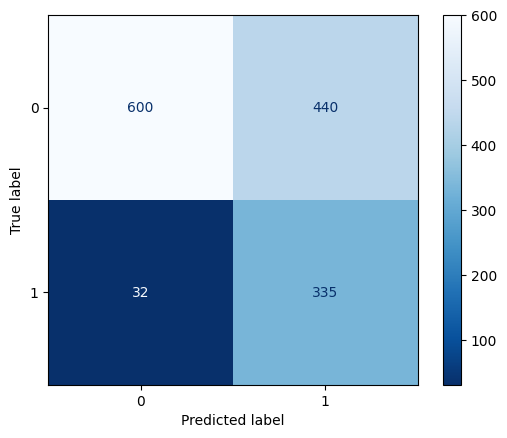

In [ ]:
#2. 오차 행렬
metrics.ConfusionMatrixDisplay.from_estimator(model_cat, X_test, y_test , cmap='Blues_r')

위의 정밀도 그리고 오차 행렬을 보면, 계약 미해지 (0) 의 정밀도와 계약 해지 (1) 의 재현율이 굉장히 높은 것을 알 수 있다. 이 말인 즉슨, 계약을 해지 하지 않는다라고 예측한 고객들 중 26명을 제외하고는 정확하게 예측을 했고, 실제로 계약을 해지한 367명의 고객중에서 30명을 제외하고는 올바르게 예측을 해냈음을 의미한다. <br>
  
재현율을 목적 함수로한 하이퍼 파리미터 튜닝이 되어있지 않은 위의 Test Model의 결과와 비교하면, 더 극명히 드러난다. 그 이유인즉슨, 정밀도에 초점이 맞춰져있고, 그로인해 계약 미해지 정밀도와 재현율만 높게 나온다. 고로, 데이터와 비즈니스 문제에 대한 이해를 토대로 모델을 빌드하여야 한다. <br>
  
계약 미해지의 재현율은 실제로 계약을 해지 하지 않은 사람들 중 모델이 계약을 해지하지 않는다를 맞게 예측한 비율이다. 허나, 회사 차원에서는 크게 의미있는 결과가 아니다. 어찌됐건 고객은 이탈하지 않았기 때문에, 회사에 손실은 없다. 계약 해지의 정밀도 역시 마찬가지다. 계약을 해지한다고 예측했는데, 실제로는 이탈하지 않았기 때문에 문제가 없다. 물론 이 부분마저 정확하게 구분을 하면 더할 나위없이 좋겠지만, 크게 문제가 되지 않는다.

In [ ]:
#!pip install shap

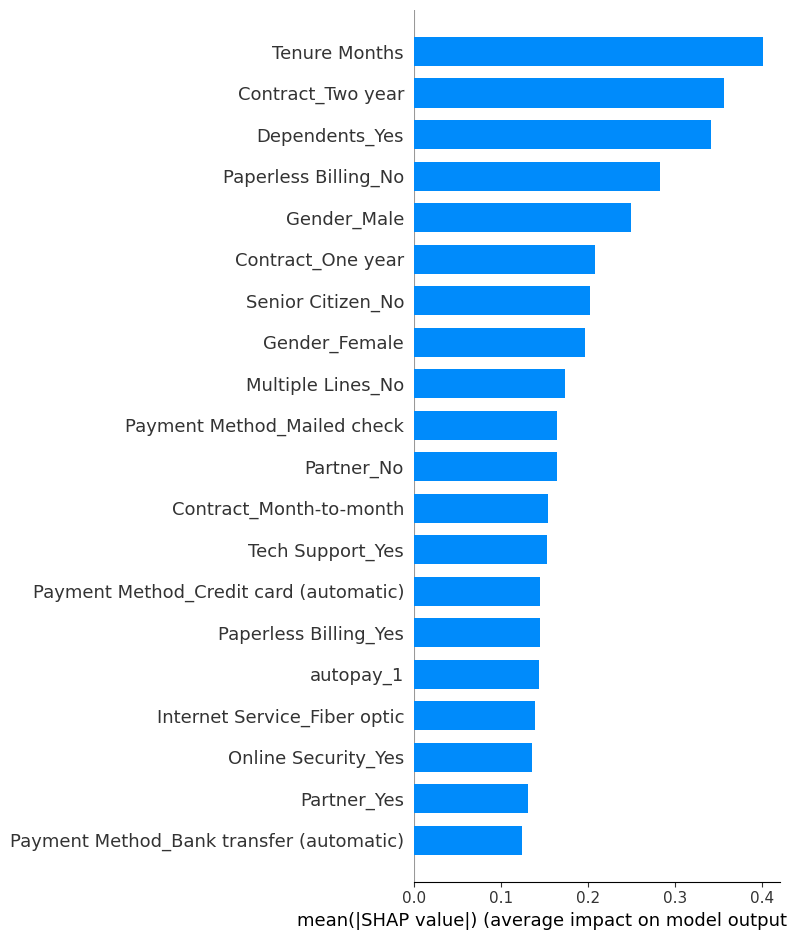

In [ ]:
#3. Post Model Analysis
import shap
explainer = shap.TreeExplainer(model_cat)
shap_values_test = explainer.shap_values(X_test)
shap_values_train = explainer.shap_values(X_resampled)
shap.summary_plot(shap_values_train, X_resampled, plot_type="bar")

위는 모델이 이탈 여부를 분류하는 과정에서 중요하게 생각하는 변수들을 SHAP 점수에 따라 정리한 것 이다. 점수가 높을수록 의사 결정에 더 많은 영향을 끼친다. 확실히 계약 기간 변수들이 중요하게 작용된 것을 볼 수 있다. 앞서 상관 관계 분석에서도 드러나듯이 계약 기간이 길면 길수록 혹은 오랜 기간 해당 통신사를 이용한 고객들은 계약을 유지하는 경향이 컸고 계약 기간이 짧으면 계약을 쉽게 해지하는 경향도 있다. <br>
  
또한 자녀의 유무가 있는지도 꽤나 중요하게 작용하는데, 이는 추후에 여러 가지 대응책 및 아이디어를 제시할 수 있는 변수가 될 수 있다.

### B. High-LTV vs. Else

해당 섹션에서는 고객 데이터를 고-LTV 고객군 그리고 그 외의 고객군으로 세분화해서 각 고객군에 catboost 모델을 적용해 피쳐 중요도를 분석한다.

In [ ]:
#Hyperparameter Tuning: 고ltv 고객군

# study_hi_ltv = optuna.create_study(direction='maximize',sampler=TPESampler())
# study_hi_ltv.optimize(lambda trial : objCat(trial, X_hi_LTV_resampled, y_hi_LTV_resampled), n_trials=50)
# print('Best Score: {}\nParams: {}'.format(study_hi_ltv.best_trial.value, study_hi_ltv.best_trial.params))

In [ ]:
#Hyperparameter Tuning: 그 외 고객군

# study_else_ltv = optuna.create_study(direction='maximize',sampler=TPESampler())
# study_else_ltv.optimize(lambda trial : objCat(trial, X_else_LTV_resampled, y_else_LTV_resampled), n_trials=50)
# print('Best Score: {}\nParams: {}'.format(study_else_ltv.best_trial.value, study_else_ltv.best_trial.params))

In [ ]:
Best_Params_high_ltv = {'colsample_bylevel': 0.018275878860328627, 'depth': 1, 'scale_pos_weight': 5, 'boosting_type': 'Ordered',
                        'bootstrap_type': 'Bayesian', 'iterations': 1200.0, 'l2_leaf_reg': 3, 'bagging_temperature': 9.845180431293848}
Best_Params_else_ltv = {'colsample_bylevel': 0.051142145118739, 'depth': 1, 'scale_pos_weight': 5, 'boosting_type': 'Plain',
                        'bootstrap_type': 'Bayesian', 'iterations': 500.0, 'l2_leaf_reg': 1, 'bagging_temperature': 1.564196402622604}

In [ ]:
#모델 훈련 및 결과: 고ltv 고객군
clf_hi_ltv = cb.CatBoostClassifier(**Best_Params_high_ltv)
model_hi_ltv = clf_hi_ltv.fit(X_hi_LTV_resampled, y_hi_LTV_resampled, verbose=False)
print(metrics.classification_report(y_hi_LTV_test, model_hi_ltv.predict(X_hi_LTV_test)))

              precision    recall  f1-score   support

           0       0.95      0.54      0.69       549
           1       0.38      0.92      0.53       166

    accuracy                           0.63       715
   macro avg       0.67      0.73      0.61       715
weighted avg       0.82      0.63      0.65       715



In [ ]:
#모델 훈련 및 결과: 그 외 고객군
clf_else_ltv = cb.CatBoostClassifier(**Best_Params_else_ltv)
model_else_ltv = clf_else_ltv.fit(X_else_LTV_resampled, y_else_LTV_resampled, verbose=False)
print(metrics.classification_report(y_else_LTV_test, model_else_ltv.predict(X_else_LTV_test)))

              precision    recall  f1-score   support

           0       0.96      0.42      0.59       485
           1       0.42      0.96      0.58       208

    accuracy                           0.59       693
   macro avg       0.69      0.69      0.59       693
weighted avg       0.80      0.59      0.59       693



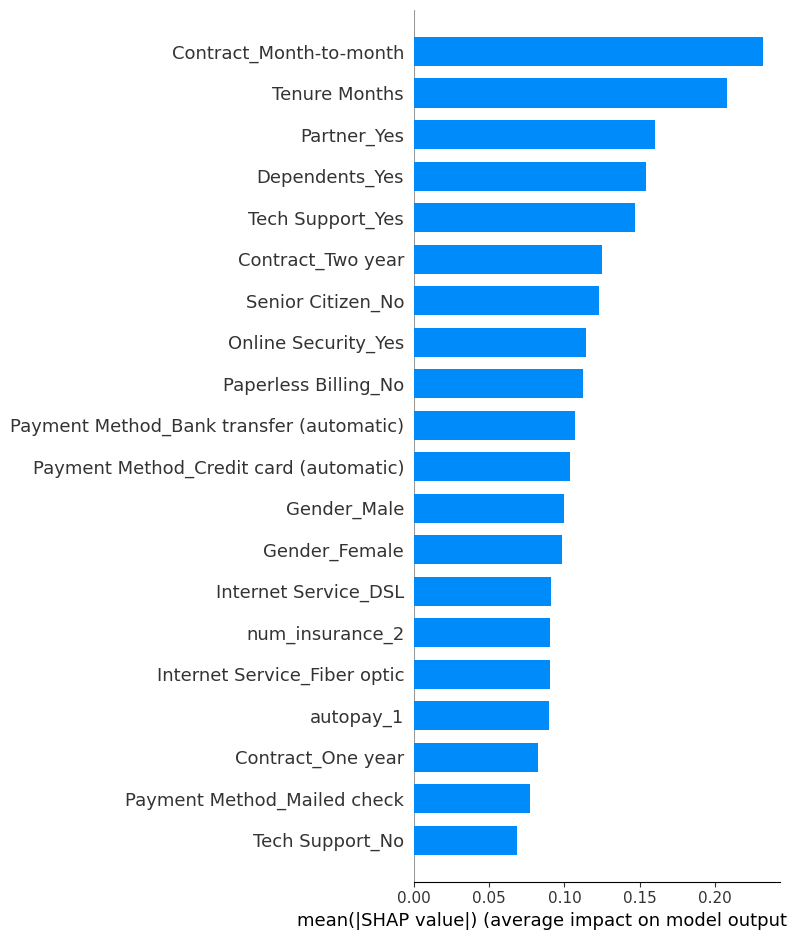

In [ ]:
#Post Modele Analysis: 고ltv 고객군
import shap
explainer_hltv = shap.TreeExplainer(model_hi_ltv)
val_hltv_test = explainer_hltv.shap_values(X_hi_LTV_test)
val_hltv_train = explainer_hltv.shap_values(X_hi_LTV_resampled)
shap.summary_plot(val_hltv_train, X_hi_LTV_resampled, plot_type="bar")

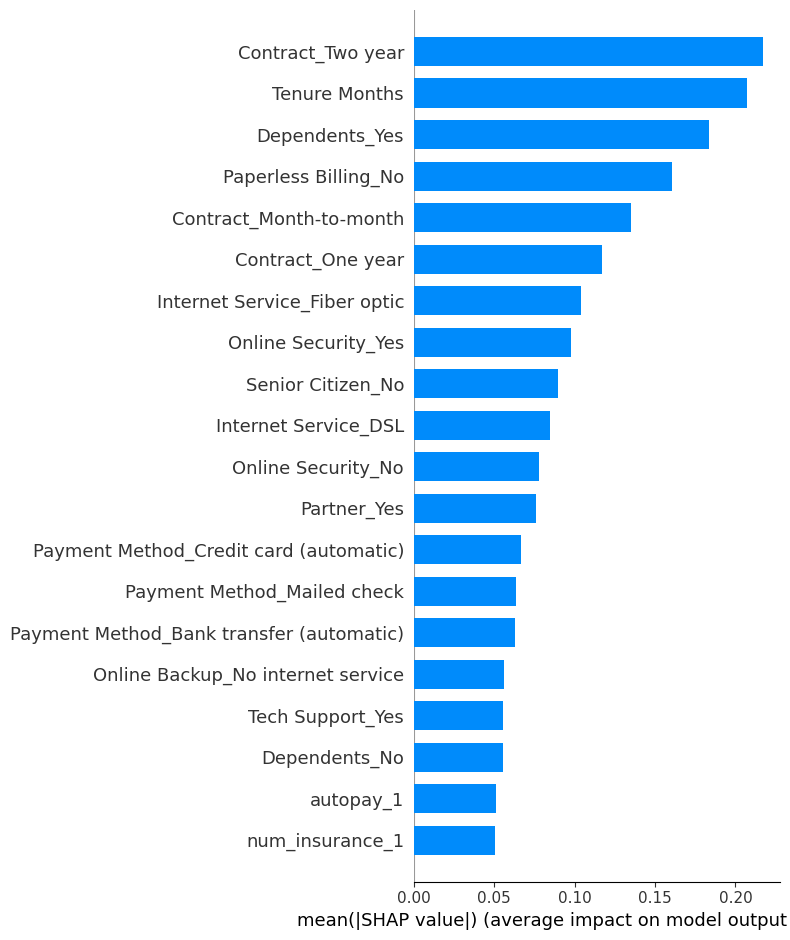

In [ ]:
#Post Modele Analysis: 그 외 고객군
import shap
explainer_else = shap.TreeExplainer(model_else_ltv)
val_else_test = explainer_else.shap_values(X_else_LTV_test)
val_else_train = explainer_else.shap_values(X_else_LTV_resampled)
shap.summary_plot(val_else_train, X_else_LTV_resampled, plot_type="bar")

**고-LTV 고객군 피쳐 중요도 Top 7** <br>
  
1. 계약 유지 기간
2. 2년 계약
3. 배우자 있음
4. 온라인 보호 서비스 구독
5. 고령자 아님
6. 온라인 청구서 하지 않음
7. Fiber Optics 인터넷 서비스 구독
  
**그 외 고객군 피쳐 중요도 Top 7** <br>

1. 2년 계약
2. 월별 계약
3. 계약 유지 기간
4. 자녀 있음
5. 온라인 청구서 하지 않음
6. 배우자 있음
7. Fiber Optics 인터넷 서비스 구독

이용 고객을 두 가지 그룹으로 군집화해서 모델을 훈련했고, 앞선 섹션과 동일한 방법으로 모델을 빌드했다. 두 그룹의 분석 결과들의 피쳐 중요도를 추출했고, 상위 7개들을 살펴보면서, 차이가 있는지 살폈다. <br>
  
*   앞선 섹션의 분석과 마찬가지로, 계약 유지 기간 및 맺어져 있는 계약 기간과 같은 변수들이 중요하게 작용했다.
*   고-LTV 고객군의 피쳐 중요도에서 온라인 보호 서비스 (Online Security) 구독 여부가 상당히 중요하게 작용했다. 그 외 고객군에서는 비교적 덜 중요하게 작용한 것과 대비된다. 이는 추후에 중요하게 고려해 볼 요소이다.



### C. 단기 고객 데이터 셋

해당 섹션에서는 두 단기 고객군: 1) 2년 이하 계약 유지 고객 2) 월 계약 고객 에 대해서 catboost 모델을 적용해보고, 해당 통신사의 비즈니스 목표가 장기 계약 고객으로의 전환율임을 가정하에 어떤 변수들이 영향을 미치는지 분석해 대응책을 제시하는 것을 목표로한다.

In [ ]:
#Hyperparameter Tuning: Short-Term Customers

# study_st = optuna.create_study(direction='maximize',sampler=TPESampler())
# study_st.optimize(lambda trial : objCat(trial, X_short_term_resampled, y_short_term_resampled), n_trials=50)
# print('Best Score: {}\nParams: {}'.format(study_st.best_trial.value, study_st.best_trial.params))

In [ ]:
#Hyperparameter Tuning: Short-Term Customers

# study_sc = optuna.create_study(direction='maximize',sampler=TPESampler())
# study_sc.optimize(lambda trial : objCat(trial, X_short_contract_resampled, y_short_contract_resampled), n_trials=50)
# print('Best Score: {}\nParams: {}'.format(study_sc.best_trial.value, study_sc.best_trial.params))

In [ ]:
#튜닝 결과 저장
Best_Params_st = {'colsample_bylevel': 0.017256341496751267, 'depth': 2, 'scale_pos_weight': 5,
                  'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'iterations': 1600.0, 'l2_leaf_reg': 1, 'subsample': 0.11855014121468488}
Best_Params_sc = {'colsample_bylevel': 0.016256557845909323, 'depth': 4, 'scale_pos_weight': 5,
                  'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'iterations': 500.0, 'l2_leaf_reg': 1, 'bagging_temperature': 7.723913002761337}

In [ ]:
#2년 이하 사용 고객 모델
clf_st = cb.CatBoostClassifier(**Best_Params_st)
model_st = clf_st.fit(X_short_term_resampled, y_short_term_resampled, verbose=False)
print(metrics.classification_report(y_short_term_test, model_st.predict(X_short_term_test)))

              precision    recall  f1-score   support

           0       0.89      0.23      0.36       369
           1       0.48      0.96      0.64       273

    accuracy                           0.54       642
   macro avg       0.69      0.60      0.50       642
weighted avg       0.72      0.54      0.48       642



In [ ]:
# 월 계약 고객 모델
clf_sc = cb.CatBoostClassifier(**Best_Params_sc)
model_sc = clf_sc.fit(X_short_contract_resampled, y_short_contract_resampled, verbose=False)
print(metrics.classification_report(y_short_contract_test, model_sc.predict(X_short_contract_test)))

              precision    recall  f1-score   support

           0       0.85      0.07      0.12       425
           1       0.46      0.99      0.63       350

    accuracy                           0.48       775
   macro avg       0.66      0.53      0.38       775
weighted avg       0.68      0.48      0.35       775



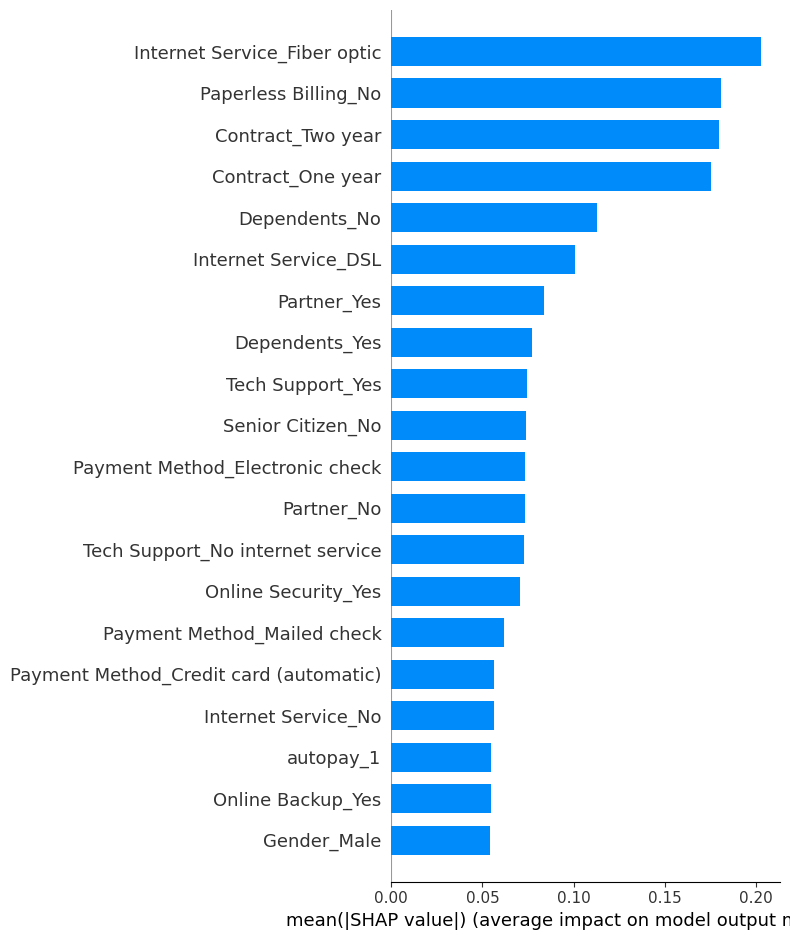

In [ ]:
#2. Post Model Analysis: 2년 이하 사용 고객
explainer_st = shap.TreeExplainer(model_st)
shap_values_st_test = explainer_st.shap_values(X_short_term_test)
shap_values_st_train = explainer_st.shap_values(X_short_term_resampled)
shap.summary_plot(shap_values_st_train, X_short_term_resampled, plot_type="bar")

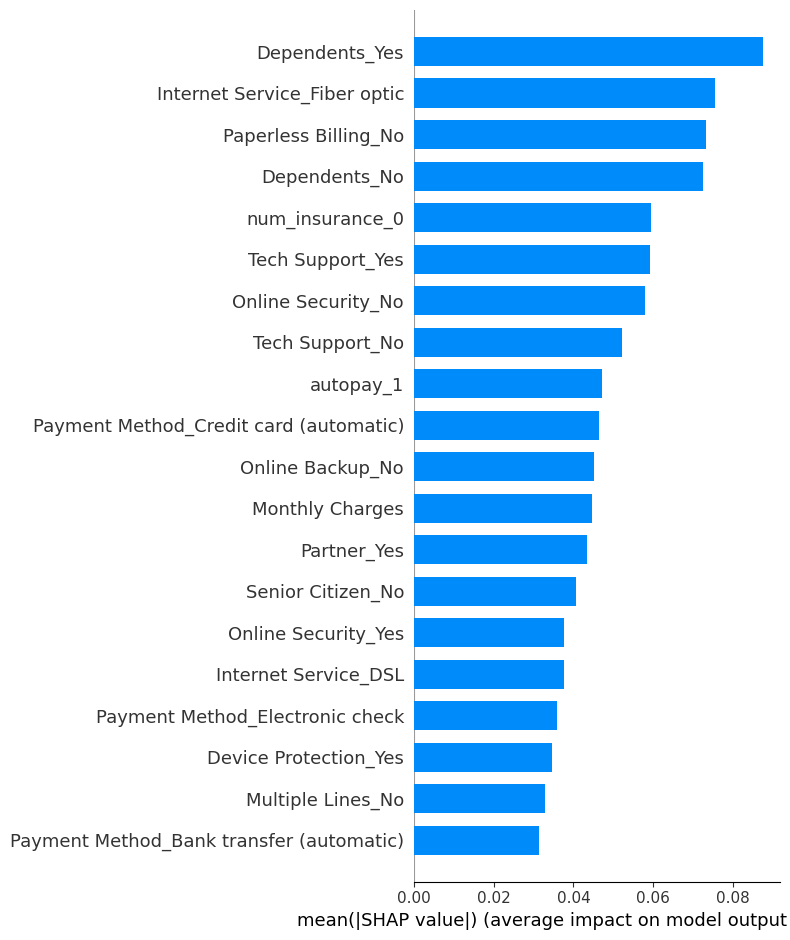

In [ ]:
#2. Post Model Analysis: 월 계약 고객
explainer_sc = shap.TreeExplainer(model_sc)
shap_values_sc_test = explainer_sc.shap_values(X_short_contract_test)
shap_values_sc_train = explainer_sc.shap_values(X_short_contract_resampled)
shap.summary_plot(shap_values_sc_train, X_short_contract_resampled, plot_type="bar")

두 모델 다 앞선 섹션과 같이 이탈 예측 재현율을 굉장히 잘 해냈다. 모델이 2년 이하의 고객의 이탈 여부를 예측할 때, 계약의 종류가 역시 중요한 역할을 했다. 1년 및 2년 계약으로인해 이탈을 하지 않는 케이스가 많았다. 이외의 변수로는 자녀의 유무와 인터넷 서비스 구독 여부가 상당한 영향을 미쳤다. <br>
  
월 계약을 하고있는 고객의 경우 위 단기 계약 고객과는 다르게 온라인(모바일) 청구서 구독 여부가 모델의 의사 결정에 큰 영향을 미쳤다.

<Axes: xlabel='Paperless Billing', ylabel='count'>

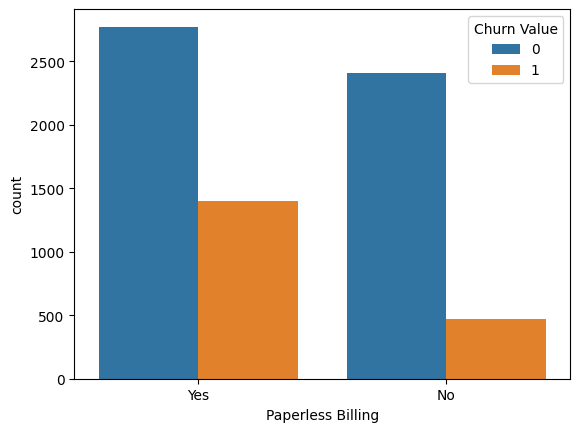

In [ ]:
sns.countplot(x='Paperless Billing', hue='Churn Value', data=data)

위의 그래프를 보면 상당히 놀라운데, 종이 청구서를 받는 고객들의 이탈률이 훨씬 더 적다는 것이다. 이는 앞선 부분에서 편의성으로 인한 고객 이탈률 감소라는 가정이 틀렸음을 보인다. 고로, 장기같해당 변수외에도 자녀의 유무 그리고 인터넷 서비스의 구독이 상당한 영향을 미쳤다.

## 분석 결과 기반 대응책 마련

**이탈 이유** <br>
  
앞서 EDA 단계에서 이탈이유의 비율을 살펴보았듯이, 서비스 제공자 및 지원팀의 태도에 불만 또는 전체적인 서비스 불만족으로 인해 계약을 해지하는 비율이 22.3 퍼센트에 달한다. 결코 적지 않은 비율이며, 이는 회사 내부적으로 해결할 수 있는 부분이기도 하다. 고로, 단기적으로는 회사 내부의 직원 교육이 우선시 되어야하고, 해당 비율을 줄이는 것이 최우선 과제가 되어야한다.

**장기 계약 고객 확보** <br>
  
앞선 상관 관계 분석 그리고 부스팅 모델의 피쳐 중요도에서도 드러나듯이 계약을 오래 유지한 고객들은 계약을 해지하지 않는 경우가 많았다. 단기 계약 고객의 비율이 높은만큼, 해당 고객들의 장기 계약 고객으로의 전환율 증가 및 리텐션 유지가 회사의 중장기 목표가 되어야한다. <br>

**전환율 증가 전략** <br>
  
부스팅 기반 예측 모델의 변수 중요도를 참고해 보았을 때, 크게 두 가지 서비스에서 변화를 모색할 필요가 있다.

1. 종이 청구서 <br>
  
  종이 청구서를 받지 않는 고객의 비율이 높지만, 전반적으로 종이 청구서를 받는 고객의 이탈률이 훨씬 적었다. 해당 통신사는 이 점을 인지하고, 종이 청구서를 받는 고객의 비율을 높이거나, 회사의 상황에 따라 전략을 세울 필요가 있다. <br>

2. 인터넷 서비스 <br>
  
  인터넷 서비스 중 Fiber Optic (광케이블) 을 사용하는 고객들의 이탈률이 굉장히 높았다. 제품 자체의 문제가 있을 가능성이 굉장히 커보이며, 해당 문제점을 파악하고 개선하는 것이 전환율 증가에 도움이 될 가능성이 높아보인다. 제품 자체에 문제 혹은 경쟁사 제품과 비교했을 때 품질이나 가격 측면에서 떨어짐에서 기인할 수 있다. 이는 추가적인 문제 탐색이 필요하다.<br>

또한 자녀가 있으면 이탈 가능성이 적기 때문에, 단기 계약 고객들 중 자녀가 있다면 프로모션을 진행해 장기 계약을 유도하는 것도 전략이다.

**고-LTV 고객군 이탈 대응 전략** <br>
  
앞선 분석에서 얘기했듯이 온라인 보호 서비스가 상당히 중요한 역할을 수행했다. 하지만, 온라인 보호 서비스를 구독하기 위해서는 인터넷 서비스 가입이 수반되어야 하기 때문에 선행적으로 인터넷 서비스 고객 유치가 선행적으로 목표되어야 한다. 앞서서 광케이블 인터넷의 문제점이 포착되었다는 것이 드러났기에, 이 문제가 먼저 해결되어야 하며, 추후에 인터넷 서비스에 온라인 보호 서비스를 기본적으로 제공하는 식의 프로모션을 진행한다면, 고-LTV 고객군의 이탈률 감소에 효과적일 수 있다.

**추가 분석 방향** <br>
  
1. **직원 태도 불만 및 서비스 불만족 해결:**

  이와 같은 이유로 계약을 해지한 고객들에 대해서 추가 서베이를 진행해 세부적인 요인을 살펴볼 필요가 있다.

2. **종이 청구서:** <br>
  
  종이 청구서를 받지 않는 (온라인/모바일 청구서) 고객들의 이탈률이 높은 점에 대한 명확한 이유를 규명할 필요가 있다.

3. **광케이블 인터넷 서비스** <br>
  
  광케이블 인터넷 서비스를 이용하는 고객들의 이탈률이 높은 이유에 대한 문제 탐색이 필요하다.